In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import time
import datetime as dt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import WhitespaceTokenizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

import warnings 
warnings.filterwarnings('ignore') 

In [2]:
edm_slug = 'EDM' # the slug for subreddit r\EDM
rock_slug = 'rock' # the slug for subreddit r\rock

In [3]:
# this function was slightly modified from Brian Collins' lecture
def query_pushshift(subreddit, kind='submission', skip=30, times=18, 
                    subfield = ['title', 'selftext', 'subreddit', 'created_utc', 'author', 'num_comments', 'score', 'is_self'],
                    comfields = ['body', 'score', 'created_utc']):

    stem = "https://api.pushshift.io/reddit/search/{}/?subreddit={}&size=500".format(kind, subreddit)
    mylist = []
    
    for x in range(1, times):
        
        URL = "{}&after={}d".format(stem, skip * x)
        print(URL)
        response = requests.get(URL)
        assert response.status_code == 200
        mine = response.json()['data']
        df = pd.DataFrame.from_dict(mine)
        mylist.append(df)
        time.sleep(2)
        
    full = pd.concat(mylist, sort=False)
    
    if kind == "submission":
        
        full = full[subfield]
        
        full = full.drop_duplicates()
        
        full = full.loc[full['is_self'] == True]
        
    def get_date(created):
        return dt.date.fromtimestamp(created)
    
    _timestamp = full["created_utc"].apply(get_date)
    
    full['timestamp'] = _timestamp

    print(full.shape)
    
    return full  

In [4]:
# calling the function to collect posts from EDM subreddit
edm_df = query_pushshift(edm_slug)

https://api.pushshift.io/reddit/search/submission/?subreddit=EDM&size=500&after=30d
https://api.pushshift.io/reddit/search/submission/?subreddit=EDM&size=500&after=60d
https://api.pushshift.io/reddit/search/submission/?subreddit=EDM&size=500&after=90d
https://api.pushshift.io/reddit/search/submission/?subreddit=EDM&size=500&after=120d
https://api.pushshift.io/reddit/search/submission/?subreddit=EDM&size=500&after=150d
https://api.pushshift.io/reddit/search/submission/?subreddit=EDM&size=500&after=180d
https://api.pushshift.io/reddit/search/submission/?subreddit=EDM&size=500&after=210d
https://api.pushshift.io/reddit/search/submission/?subreddit=EDM&size=500&after=240d
https://api.pushshift.io/reddit/search/submission/?subreddit=EDM&size=500&after=270d
https://api.pushshift.io/reddit/search/submission/?subreddit=EDM&size=500&after=300d
https://api.pushshift.io/reddit/search/submission/?subreddit=EDM&size=500&after=330d
https://api.pushshift.io/reddit/search/submission/?subreddit=EDM&siz

In [5]:
# checking the result
edm_df.head()

,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,timestamp
2,New music,[removed],EDM,1552185217,Chambo265,0,1,True,2019-03-09
9,Suggestions for best free EDM production softw...,So I've started to get into EDM in the past ye...,EDM,1552198808,Sick_Whip,11,12,True,2019-03-10
11,Floopy Goober - S P U R,[removed],EDM,1552205602,tranecod,0,1,True,2019-03-10
16,please recommend some chill music(i don't real...,so I come back to edm and want to find music l...,EDM,1552215695,patricktu1258,7,1,True,2019-03-10
21,"Weekly General Discussion - March 10, 2019",Welcome to this week's free talk thread. Pleas...,EDM,1552220104,AutoModerator,0,1,True,2019-03-10


In [6]:
# checking for duplicate titles
edm_df['title'].value_counts().head()

Is someone willing to buy a qlimax ticket (will pay obviously)              2
Need help finding a song                                                    2
[THREE GENRES IN ONE ! ] - SVDDEN DEATH X AFK - BZZRK (SØL X OHNO REMIX)    2
What is EDM like in Las Vegas?                                              2
...                                                                         2
Name: title, dtype: int64

In [7]:
# removing any duplicate titles
edm_df.drop_duplicates(subset='title', inplace=True)
# ensuring that this was done properly
edm_df['title'].value_counts().head()

Which EDM song has been the most remixed so far?                                                            1
Malaa live?                                                                                                 1
Progressive House playlist!                                                                                 1
[Question] How long is typically warm-up for big name artists? (R3hab concert)                              1
I helped develop an app where people can listen to music and chat at the same time! It’s called Playlist    1
Name: title, dtype: int64

In [8]:
# checking the number of rows and columns in the dataset
edm_df.shape

(1963, 9)

In [9]:
# calling the function to collect posts from rock subreddit
rock_df = query_pushshift(rock_slug, times=150)

https://api.pushshift.io/reddit/search/submission/?subreddit=rock&size=500&after=30d
https://api.pushshift.io/reddit/search/submission/?subreddit=rock&size=500&after=60d
https://api.pushshift.io/reddit/search/submission/?subreddit=rock&size=500&after=90d
https://api.pushshift.io/reddit/search/submission/?subreddit=rock&size=500&after=120d
https://api.pushshift.io/reddit/search/submission/?subreddit=rock&size=500&after=150d
https://api.pushshift.io/reddit/search/submission/?subreddit=rock&size=500&after=180d
https://api.pushshift.io/reddit/search/submission/?subreddit=rock&size=500&after=210d
https://api.pushshift.io/reddit/search/submission/?subreddit=rock&size=500&after=240d
https://api.pushshift.io/reddit/search/submission/?subreddit=rock&size=500&after=270d
https://api.pushshift.io/reddit/search/submission/?subreddit=rock&size=500&after=300d
https://api.pushshift.io/reddit/search/submission/?subreddit=rock&size=500&after=330d
https://api.pushshift.io/reddit/search/submission/?subred

https://api.pushshift.io/reddit/search/submission/?subreddit=rock&size=500&after=2880d
https://api.pushshift.io/reddit/search/submission/?subreddit=rock&size=500&after=2910d
https://api.pushshift.io/reddit/search/submission/?subreddit=rock&size=500&after=2940d
https://api.pushshift.io/reddit/search/submission/?subreddit=rock&size=500&after=2970d
https://api.pushshift.io/reddit/search/submission/?subreddit=rock&size=500&after=3000d
https://api.pushshift.io/reddit/search/submission/?subreddit=rock&size=500&after=3030d
https://api.pushshift.io/reddit/search/submission/?subreddit=rock&size=500&after=3060d
https://api.pushshift.io/reddit/search/submission/?subreddit=rock&size=500&after=3090d
https://api.pushshift.io/reddit/search/submission/?subreddit=rock&size=500&after=3120d
https://api.pushshift.io/reddit/search/submission/?subreddit=rock&size=500&after=3150d
https://api.pushshift.io/reddit/search/submission/?subreddit=rock&size=500&after=3180d
https://api.pushshift.io/reddit/search/subm

In [10]:
# checking the result
rock_df.head()

,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,timestamp
3,Any good rock songs from rock artists older th...,I have a firm belief that great rock is create...,rock,1552183723,The_Laviathen_Builds,20,11,True,2019-03-09
7,Why has rock music left the mainstream?,"Elvis Presley, The Rolling Stones, Led Zeppeli...",rock,1552194724,The_Laviathen_Builds,64,45,True,2019-03-10
10,What's a good album to obsess over?,To clarify: \n\- An album with thought-provok...,rock,1552208611,felinfine8,21,6,True,2019-03-10
15,Soda Stereo - De Musica Ligera,[https://www.youtube.com/watch?v=IibXYWSBpZw](...,rock,1552231584,cuntymonty,0,1,True,2019-03-10
33,Hey guys! Can i get some feedback on this song...,\nhttps://soundcloud.com/m1stofficial/last-nig...,rock,1552275869,UnluckyEducator,1,0,True,2019-03-10


In [11]:
# checking for duplicate titles
rock_df['title'].value_counts().head()

hi                           12
ROCK ne demek ROCK Türkçe     5
Song name?                    3
Hi                            3
Looking for suggestions       2
Name: title, dtype: int64

In [12]:
# removing any duplicate titles
rock_df.drop_duplicates(subset='title', inplace=True)
# ensuring that this was done properly
rock_df['title'].value_counts().head()

Looking for Japanese-like English rock                                                                                                                             1
What are your top ten rock bands with their best album and best song (sorry if this has been posted before)(Favorite song doesn’t have to be in favorite album)    1
The Who                                                                                                                                                            1
Aerosmith Las Vegas. Worth it like that?                                                                                                                           1
.$*$.[*HD-COPY*][Watch][The Visit 2015][ Online][Free][Quality][HD]                                                                                                1
Name: title, dtype: int64

In [13]:
# checking the number of rows and columns in the dataset
rock_df.shape

(1936, 9)

In [14]:
# merging the edm and rock posts into a single dataframe
reddit = pd.concat([edm_df, rock_df])
# confirming the result
reddit.shape

(3899, 9)

In [15]:
# saving the data to a csv file
reddit.to_csv('reddit.csv')

In [16]:
# checking for nulls in the dataframe
reddit.isna().sum()

title            0
selftext        86
subreddit        0
created_utc      0
author           0
num_comments     0
score            0
is_self          0
timestamp        0
dtype: int64

In [17]:
# checking the the two classes are reasonably balanced
reddit['subreddit'].value_counts(normalize=True)

EDM     0.503462
rock    0.496538
Name: subreddit, dtype: float64

In [18]:
# turning the target column into 1's for all the EDM posts and 0's in all the rock posts
reddit['subreddit'] = reddit['subreddit'].map({'EDM': 1, 'rock': 0})

In [19]:
# checkig for duplicates in the title column
reddit['title'].value_counts().head()

Does anyone know the name of this song?    2
Started a Discord server around music      2
Need help finding a song!                  2
Looking for suggestions                    2
Can someone help me ID this song?          2
Name: title, dtype: int64

In [20]:
# dropping duplicates in the title column
reddit.drop_duplicates(subset='title', inplace=True)

In [21]:
# confirming the result
reddit['title'].value_counts().head()

Any new rock songs to listen to? ive been listening to the songs over and over, and i want to hear some new ones.    1
NOTHING BUT THIEVES                                                                                                  1
How does a person “dj” at a club or event                                                                            1
Help me find this ID Song Edm/trance                                                                                 1
Can anyone suggest bands similar to led zeppelin                                                                     1
Name: title, dtype: int64

In [22]:
# making sure that the classes are still reasonably balanced after removing data
reddit['subreddit'].value_counts(normalize=True)

1    0.504238
0    0.495762
Name: subreddit, dtype: float64

In [23]:
# examining the selftext column
reddit['selftext'].head(50)

2                                              [removed]
9      So I've started to get into EDM in the past ye...
11                                             [removed]
16     so I come back to edm and want to find music l...
21     Welcome to this week's free talk thread. Pleas...
26                                                      
30     I Personally like both for different reasons, ...
31     Apart from Spotify, Beatport and SoundCloud, a...
40                                                      
43     I've seen a few people mention Slam FM on the ...
46     Hey guys, for the past few years I've been a h...
49     &amp;#x200B;\n\nRSVP-&gt; [https://www.faceboo...
51      What is the best festival track in your opinion?
62      Hi there everyone! I'm getting nervous and ma...
68     I'd like to go see a DJ in Las Vegas, like Afr...
74                                             [removed]
76                                             [removed]
78                             

Many of these threads have very little text or no textr at all in their content. Much of it is people posting links to playlists or videos. We can get enough data if we join the titles with their corresponding selftext. If the data in the selftext is not useful, I am electing to just replace it with an empty string, as it will be merged with a title later and will still have enough relevent data to be able to make predictions.

In [24]:
# replacing any NaN values with an empty string
reddit.fillna('', inplace=True)

In [25]:
# checking that all nulls have been dealt with
reddit.isna().sum()

title           0
selftext        0
subreddit       0
created_utc     0
author          0
num_comments    0
score           0
is_self         0
timestamp       0
dtype: int64

In [26]:
# this function will replace any posts that say [removed], \[removed\], or [deleted] with an empty string
def blank_posts(val):
    # checking if the value of a data point (string) is one of the three options for non-posts
    if val == '[removed]' or val == '[deleted]' or val == '\\[removed\\]':
        # if the posts was removed or deleted, turn it into an empty string
        return ''
    # otherwise, do nothing to the value
    else:
        return val

In [27]:
# calling the function above to fix posts that say deleted or removed
reddit['selftext'] = reddit['selftext'].map(lambda val: blank_posts(val))

In [28]:
# concatinating the titles with the self text for each reddit thread to make a new column called 'text'
reddit['text'] = reddit['title'] + ' ' + reddit['selftext']
# confirming the result
reddit[['text', 'title', 'selftext']].head(20)

,text,title,selftext
2,New music,New music,
9,Suggestions for best free EDM production softw...,Suggestions for best free EDM production softw...,So I've started to get into EDM in the past ye...
11,Floopy Goober - S P U R,Floopy Goober - S P U R,
16,please recommend some chill music(i don't real...,please recommend some chill music(i don't real...,so I come back to edm and want to find music l...
21,"Weekly General Discussion - March 10, 2019 Wel...","Weekly General Discussion - March 10, 2019",Welcome to this week's free talk thread. Pleas...
26,"Proper starting to love psy-trance, I’m a heav...","Proper starting to love psy-trance, I’m a heav...",
30,"Which Music DJ Do You Prefer, ‘Calvin Harris’ ...","Which Music DJ Do You Prefer, ‘Calvin Harris’ ...","I Personally like both for different reasons, ..."
31,Where do you guys find new EDM music? Apart fr...,Where do you guys find new EDM music?,"Apart from Spotify, Beatport and SoundCloud, a..."
40,What’s your “only at an EDM concert” moment?,What’s your “only at an EDM concert” moment?,
43,Do people outside the Netherlands use Slam FM ...,Do people outside the Netherlands use Slam FM ...,I've seen a few people mention Slam FM on the ...


In [29]:
# instsantiating a tokenizer
tok = WhitespaceTokenizer()
# tokenizing the 'text' column
reddit['text'] = reddit['text'].map(lambda x: tok.tokenize(x.lower()))
# confirming the result
reddit['text'].head()

2                                          [new, music]
9     [suggestions, for, best, free, edm, production...
11                      [floopy, goober, -, s, p, u, r]
16    [please, recommend, some, chill, music(i, don'...
21    [weekly, general, discussion, -, march, 10,, 2...
Name: text, dtype: object

In [30]:
# this function will take out any tokens that are URL's
def remove_urls(word_list):
    # for a list of tokens, filter out anything that contains 'http'
    return [word for word in word_list if 'http' not in word]
# calling the function on each list of tokens in the 'text' column
reddit['text'] = reddit['text'].map(lambda x: remove_urls(x))

In [31]:
# this function will remove any punctuation that may exist at the end of a token
def remove_punc(word_list):
    # a list of punctuation characters that will be removed
    punc_list = ["'", ".", "?", "!", ","]
    # if the last character of the word is one of the above characters, remove it from the word
    return [word[:-1] if word[-1] in punc_list else word for word in word_list]
# calling the function above on each list of tokens in the 'text' column            
reddit['text'] = reddit['text'].map(lambda x: remove_punc(x))
# checking that the tokens have been cleaned up sufficiently
reddit['text'].head(50)

2                                           [new, music]
9      [suggestions, for, best, free, edm, production...
11                       [floopy, goober, -, s, p, u, r]
16     [please, recommend, some, chill, music(i, don'...
21     [weekly, general, discussion, -, march, 10, 20...
26     [proper, starting, to, love, psy-trance, i’m, ...
30     [which, music, dj, do, you, prefer, ‘calvin, h...
31     [where, do, you, guys, find, new, edm, music, ...
40     [what’s, your, “only, at, an, edm, concert”, m...
43     [do, people, outside, the, netherlands, use, s...
46     [where, do, djs, buy/download, their, tracks, ...
49     [i'll, be, spinning, some, tunes, in, miami, m...
51     [best, festival, track, what, is, the, best, f...
62     [help, -, i, can't, find, someone's, account, ...
68     [question, about, seeing, dj's, in, las, vegas...
74                              [curated, edm, playlist]
76     [dedicated, to, curating, this, edm, playlist,...
78                        [do, 

In [32]:
# instantiating a lemmatizer
lem = WordNetLemmatizer()
# lemmatizing the 'text' column
reddit['text'] = reddit['text'].map(lambda x: [lem.lemmatize(i) for i in x])
# checking the result
reddit['text'].head()

2                                          [new, music]
9     [suggestion, for, best, free, edm, production,...
11                      [floopy, goober, -, s, p, u, r]
16    [please, recommend, some, chill, music(i, don'...
21    [weekly, general, discussion, -, march, 10, 20...
Name: text, dtype: object

In [33]:
# this function will turn each list of tokens back into a single string of text
def make_docs(word_list):
    # creating an empty string to store the document
    doc = ''
    # loop through each of the tokens
    for word in word_list:
        # adding each word to the document separated with a space in between 
        doc += (word + ' ')
    # returning the updated document
    return doc

In [34]:
# calling the function above on the 'text' column
reddit['text'] = reddit['text'].map(lambda x: make_docs(x))

In [35]:
# setting the X for modeling as the 'text' column
X = reddit['text']
# setting the target as the 'subreddit' column
y = reddit['subreddit']

In [36]:
# permorming a train/test split on the data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In testing out different models, I found that some models did better with a count vectorizer and others did better with a TF-DIF vectorizer, so I am instantiating both here. I also did grid testing to determine the best possible parameters for the two vectorizers and they both did the best with the parameters chosen below.

In [37]:
# instantiating a count vectorizer for NLP
cvec = CountVectorizer(max_features=5_000, stop_words='english', ngram_range=(1,2))
# instantiating a TF-DIF vectorizer for NLP
tvec = TfidfVectorizer(max_features=5_000, stop_words='english', ngram_range=(1,2))

In [38]:
# fitting and transforming the training data to the count vectorizer
X_train_cv = cvec.fit_transform(X_train)
# transforming the test data to the count vectorizer
X_test_cv = cvec.transform(X_test)
# fitting and transforming the training data to the TF-DIF vectorizer
X_train_tv = tvec.fit_transform(X_train)
# transforming the test data to the count vectorizer
X_test_tv = tvec.transform(X_test)

In [39]:
# storing the vectorized data in a dataframe for easy viewing and visualizations
X_train_df = pd.DataFrame(X_train_cv.toarray(), columns=cvec.get_feature_names())
# viewing the data
X_train_df.head()

,00,000,00p,01,10,10 000,10 cold,10 year,100,100 dj,...,zeppelin,zeppelin fan,zeppelin song,zepplin,zero,zevon,zhu,zombie,zomboy,zz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# instantiating a logistic regression model
# from testing different options, the best result came from ridge regularization with an alpha of 5
lr = LogisticRegression(C=.2)
# fitting the count vectorized training data to the model
lr.fit(X_train_cv, y_train)
# evaluating the model on the training data
print(f'Training Score: {cross_val_score(lr, X_train_cv, y_train, cv=5).mean()}')
# evaluating the model on the testing data
print(f'Test Score: {cross_val_score(lr, X_test_cv, y_test, cv=5).mean()}')

Training Score: 0.8931140138687308
Test Score: 0.8449626956254349


In [41]:
# instantiating a logistic regression model
# from testing different options, the best result came from ridge regularization with an alpha of 5
lr = LogisticRegression(C=.2)
# fitting the TF-DIF vectorized training data to the model
lr.fit(X_train_tv, y_train)
# evaluating the model on the training data
print(f'Training Score: {cross_val_score(lr, X_train_tv, y_train, cv=5).mean()}')
# evaluating the model on the testing data
print(f'Test Score: {cross_val_score(lr, X_test_tv, y_test, cv=5).mean()}')

Training Score: 0.8770010702086173
Test Score: 0.8500646285476918


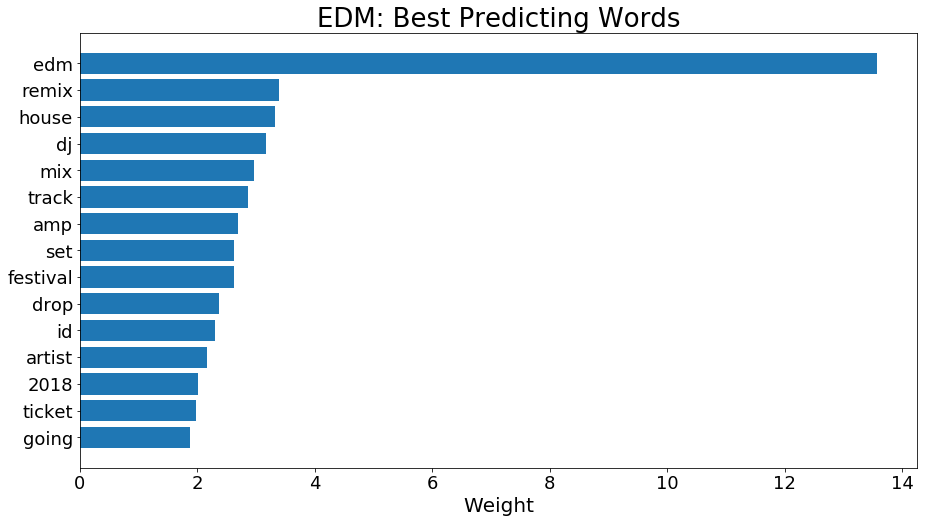

In [42]:
# creating a list of all words being analyzed with their corresponding coefficients from logistic regression
log_coefs = pd.DataFrame(list(zip(X_train_df, np.exp(lr.coef_[0]))))
# creating a table of the top 15 coefficients and the words they belong to
table = log_coefs.sort_values(1, ascending=False).head(15)
# creating a figure in matplotlib and setting the size of the figure
plt.figure(figsize=(15,8))
# plotting a horizontal bar chart on the figure
plt.barh(table[0], table[1])
# labeling and formatting the y axis
plt.xlabel('Weight', fontsize=20)
# setting the font for the xticks
plt.xticks(fontsize=18)
# the line of code below was taken from stackoverflow.com
# flips the y axis so that the largest bars are on top
plt.ylim(plt.ylim()[::-1])
# setting the font of the yticks
plt.yticks(fontsize=18)
# setting and formatting the title
plt.title('EDM: Best Predicting Words', fontsize=26);

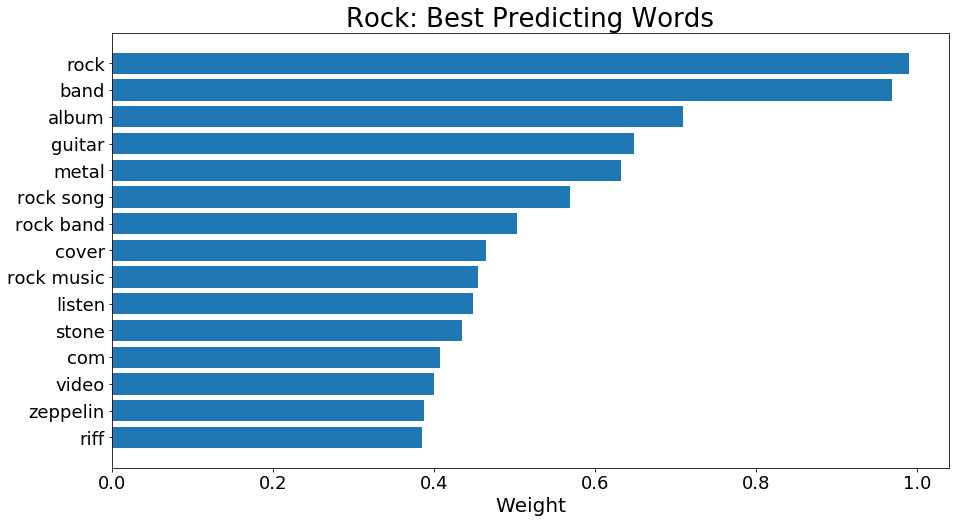

In [43]:
# creating a table of the bottom 15 coefficients and the words they belong to
table = log_coefs.sort_values(1).head(15)
# creating a figure in matplotlib and setting the size of the figure
plt.figure(figsize=(15,8))
# plotting a horizontal bar chart on the figure
# 1 - the coefficients to make the most relevent words the largest bar
plt.barh(table[0], (1 - table[1]))
# the line of code below was taken from stackoverflow.com
# flips the y axis so that the largest bars are on top
plt.ylim(plt.ylim()[::-1])
# setting the font of the yticks
plt.yticks(fontsize=18)
# labeling and formatting the x axis
plt.xlabel('Weight', fontsize=20)
# setting the font of the x ticks
plt.xticks(fontsize=18)
# setting and formatting the title
plt.title('Rock: Best Predicting Words', fontsize=26);

In [44]:
# instantiating a multinomial naive bayes classifier
nb = MultinomialNB()
# fitting the count vectorized training data to the model
nb.fit(X_train_cv, y_train)
# evaluating the model on the training data
print(f'Training Score: {cross_val_score(nb, X_train_cv, y_train, cv=5).mean()}')
# evaluating the model on the test data
print(f'Test Score: {cross_val_score(nb, X_test_cv, y_test, cv=5).mean()}')

Training Score: 0.9095559367257481
Test Score: 0.8665015347931402


In [45]:
# instantiating a multinomial naive bayes classifier
nb = MultinomialNB()
# fitting the count vectorized training data to the model
nb.fit(X_train_tv, y_train)
# evaluating the model on the training data
print(f'Training Score: {cross_val_score(nb, X_train_tv, y_train, cv=5).mean()}')
# evaluating the model on the test data
print(f'Test Score: {cross_val_score(nb, X_test_tv, y_test, cv=5).mean()}')

Training Score: 0.9143481256688805
Test Score: 0.8562238694050182


In [46]:
# instantiating a pipeline for model testing
pipe = Pipeline([
    # the first item will be a count vectorizer with the optimal parameters from above
    ('cvec', CountVectorizer(max_features=5_000, stop_words='english', ngram_range=(1,2))),
    # the second item will be a random forest classifier
    ('rf', RandomForestClassifier())
])

In [47]:
# setting up a parameter grid to search over
pipe_params = {
    # different parameter combinations to search over
    'rf__min_samples_split': [14, 15, 16],
    'rf__n_jobs': [14, 15, 16]
}
# instantiating a grid search
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=5)
# fitting the training data to the grid search
gs.fit(X_train, y_train)
# printing the best resulting score
print(gs.best_score_)
# displaying the best resulting parameters
gs.best_params_

0.8783830078794107


{'rf__min_samples_split': 15, 'rf__n_jobs': 16}

In [48]:
# instantiating a pipeline for model testing
pipe = Pipeline([
    # the first item will be a TF-DIF vectorizer with the optimal parameters from above
    ('tvec', TfidfVectorizer(max_features=5_000, stop_words='english', ngram_range=(1,2))),
    # the second item will be a random forest classifier
    ('rf', RandomForestClassifier())
])

In [49]:
# setting up a parameter grid to search over
pipe_params = {
    # different parameter combinations to search over
    'rf__min_samples_split': [11, 12, 13, 14, 15],
    'rf__n_jobs': [13, 14, 15, 16]
}
# instantiating a grid search
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=5)
# fitting the training data to the grid search
gs.fit(X_train, y_train)
# printing the best resulting score
print(gs.best_score_)
# displaying the best resulting parameters
gs.best_params_

0.869475847893114


{'rf__min_samples_split': 12, 'rf__n_jobs': 16}

The count vectorizer seems to be performing slightly better than the TD-DIF vectorizer for the random forest, so I will use the count vectorizer in the final model.

In [50]:
# instatiating a random forest classifier with the optimal parameters from the grid search above
rf = RandomForestClassifier(min_samples_split=13, n_jobs=15)
# fitting the training data to the model
lr.fit(X_train_cv, y_train)
# evaluating the model on the training data
print(f'Training Score: {cross_val_score(rf, X_train_cv, y_train, cv=5).mean()}')
# evaluating the model on the test data
print(f'Test Score: {cross_val_score(rf, X_test_cv, y_test, cv=5).mean()}')

Training Score: 0.8691190570435854
Test Score: 0.8347745283680483


In [51]:
# instantiating a pipeline for model testing
pipe = Pipeline([
    # the first item will be a count vectorizer with the optimal parameters from above
    ('cvec', CountVectorizer(max_features=5_000, stop_words='english', ngram_range=(1,2))),
    # the second item will be a K-nn classifier
    ('knn', KNeighborsClassifier())
])

In [52]:
# setting up a parameter grid to search over
pipe_params = {
    # setting all the values of k to test over
    'knn__n_neighbors': [1, 3, 5, 7, 9, 11, 13]
}
# instantiating a grid search
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=5)
# fitting the training data to the grid search
gs.fit(X_train, y_train)
# printing the best resulting score
print(gs.best_score_)
# displaying the best resulting parameters
gs.best_params_

0.7403220280918122


{'knn__n_neighbors': 1}

In [53]:
# instantiating a pipeline for model testing
pipe = Pipeline([
    # the first item will be a TF-DIF vectorizer with the optimal parameters from above
    ('tvec', TfidfVectorizer(max_features=5_000, stop_words='english', ngram_range=(1,2))),
    # the second item will be a K-nn classifier
    ('knn', KNeighborsClassifier())
])

In [54]:
# setting up a parameter grid to search over
pipe_params = {
    # setting all the values of k to test over
    'knn__n_neighbors': [1, 3, 5, 7, 9, 11, 13]
}
# instantiating a grid search
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=5)
# fitting the training data to the grid search
gs.fit(X_train, y_train)
# printing the best resulting score
print(gs.best_score_)
# displaying the best resulting parameters
gs.best_params_

0.5594381637547106


{'knn__n_neighbors': 1}

In [55]:
knn = KNeighborsClassifier(n_neighbors=5)
lr.fit(X_train_cv, y_train)
print(f'Training Score: {cross_val_score(knn, X_train_cv, y_train, cv=5).mean()}')
print(f'Test Score: {cross_val_score(knn, X_test_cv, y_test, cv=5).mean()}')

Training Score: 0.7135922358563869
Test Score: 0.7104595208424369
